In [ ]:
'''
Kazi Mahathir Rahman
ID - 23341066
Sec - 01
'''

'\nKazi Mahathir Rahman\nID - 23341066\nSec - 02\n'

In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
test_X = pd.read_csv('/content/drive/MyDrive/CSE427 ML datasets/Lab5/lab1_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/CSE427 ML datasets/Lab1/test_prediction.csv')
%pwd
#https://neptune.ai/blog/google-colab-dealing-with-files
test_X.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(test_X.shape)

(418, 11)


<Axes: >

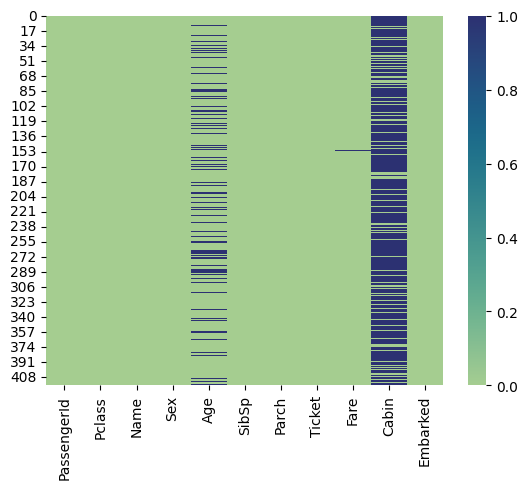

In [ ]:
sbn.heatmap(test_X.isnull(), cmap = 'crest')
# additional arguments ( xticklabels = False, yticklabels = False, cbar = False)

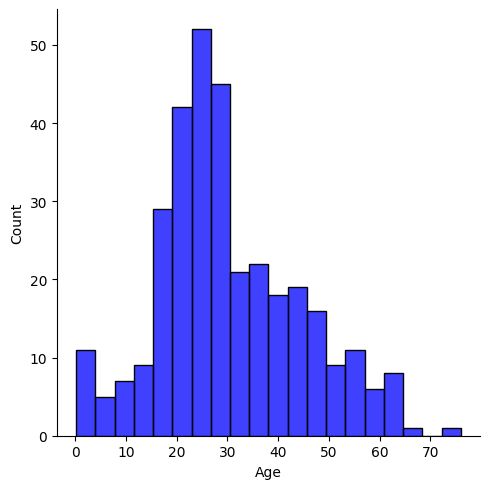

In [ ]:
sbn.displot(test_X['Age'].dropna(),kind = 'hist', color = 'blue', bins = 20)

<Axes: >

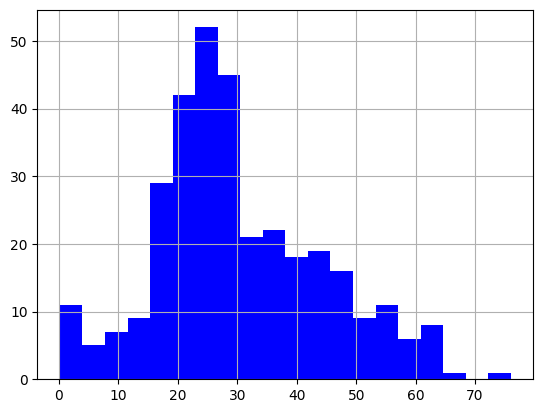

In [ ]:
test_X['Age'].hist(bins = 20, color = 'blue', alpha = 1)

<Axes: xlabel='Pclass', ylabel='Age'>

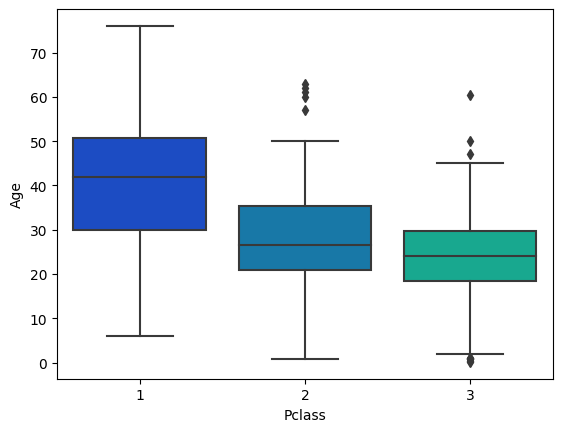

In [ ]:
sbn.boxplot(data = test_X, x = 'Pclass', y = 'Age', palette = 'winter')

<Axes: >

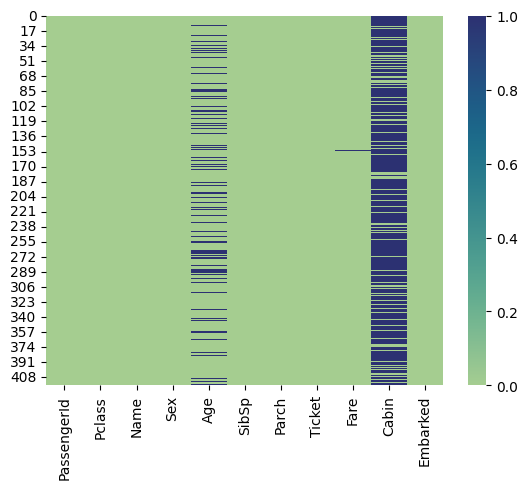

In [ ]:
#heatmap to find the null value in every columns

sbn.heatmap(test_X.isnull(), cmap = 'crest')

In [ ]:
#data preprocessing

y_test = y_test.to_numpy()
row, col = test_X.shape

for r in range(row):
  if test_X['Pclass'][r] == 1:
    test_X['Age'][r] = 38
  elif test_X['Pclass'][r] == 2:
    test_X['Age'][r] = 30
  else:
    test_X['Age'][r] = 25

test_X.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

embarked = pd.get_dummies(test_X['Embarked'])
sex = pd.get_dummies(test_X['Sex'])
test_X.drop(['Embarked', 'Sex'], axis = 1, inplace = True)
test_X.head()

test = pd.concat([test_X, sex, embarked], axis = 1)

b = np.ones([418, 1], dtype=int)
x = test.to_numpy()
x = np.concatenate([x, b], axis=1)

<ipython-input-48-0f8254ff9c50>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Age'][r] = 25
<ipython-input-48-0f8254ff9c50>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Age'][r] = 30
<ipython-input-48-0f8254ff9c50>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Age'][r] = 38


In [ ]:
def calculate_distance(a, b):
    return np.sqrt(np.sum((a[:-1] - b) ** 2))

def k_nearest_neighbors(a, x, k):
    distances = [calculate_distance(a, data_point) for data_point in x]
    sorted_indices = np.argsort(distances)
    k_nearest_indices = sorted_indices[1:k+1]
    return k_nearest_indices

accuracy = 0
for i in range(len(x)):
  a = x[i]
  K = 5
  k_nearest_indices = k_nearest_neighbors(a, x[:, :-1], K)

  survived_count = np.sum(y_test[k_nearest_indices] == 1)
  not_survived_count = K - survived_count

  if survived_count > not_survived_count:
      #print("survived")
      prediction = 1
  else:
      #print("not survived")
      prediction = 0

  if prediction == y_test[i][1]:
      accuracy += 1

print(accuracy/len(x)*100)

85.16746411483254
